<a href="https://colab.research.google.com/github/Jaoz7926/ML/blob/main/14_Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 導入必要的庫
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# 生成 120 個點，4 個中心
X, y_true = make_blobs(n_samples=120, centers=[[-4, -4], [2, 2], [-2, 5], [4, -3]], cluster_std=0.9, random_state=0)

# 將數據轉為 DataFrame（便於操作）
X_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# 顯示前幾行數據
print(X_df.head())

   Feature1  Feature2
0 -4.805920 -3.651788
1 -4.570890 -4.326467
2  5.345036 -4.862987
3 -1.661217  4.010539
4 -4.348594 -4.272072


In [2]:
# 檢查數據資訊
print("缺失值數量:", X_df.isnull().values.sum())
print("數據集形狀:", X_df.shape)
print("欄位名稱:", X_df.keys())
print("第一筆數據內容:", X_df.iloc[0, :])

缺失值數量: 0
數據集形狀: (120, 2)
欄位名稱: Index(['Feature1', 'Feature2'], dtype='object')
第一筆數據內容: Feature1   -4.805920
Feature2   -3.651788
Name: 0, dtype: float64


In [3]:
# 定義執行階層式聚類和繪圖的函數
def run_hierarchical_clustering(X, n_clusters, title):
    # 訓練階層式聚類模型
    model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    labels = model.fit_predict(X)

    # 打印每個群的點數
    print(f"\n{n_clusters} Clusters - Value Counts:")
    print(pd.Series(labels).value_counts())

    # 繪製散點圖
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title(title)
    plt.show()

    return labels


4 Clusters - Value Counts:
0    30
2    30
3    30
1    30
Name: count, dtype: int64


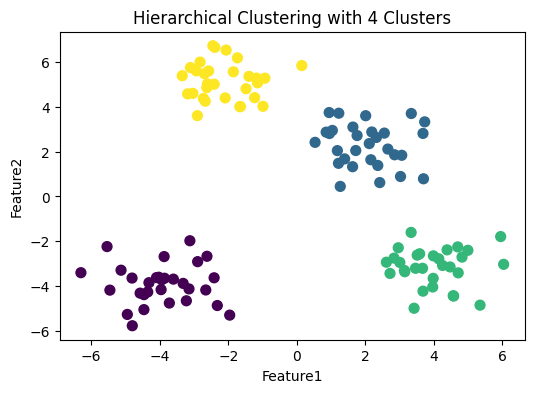

In [4]:
# 執行階層式聚類，分成 4 群
labels_4 = run_hierarchical_clustering(X, n_clusters=4, title='Hierarchical Clustering with 4 Clusters')


3 Clusters - Value Counts:
0    60
1    30
2    30
Name: count, dtype: int64


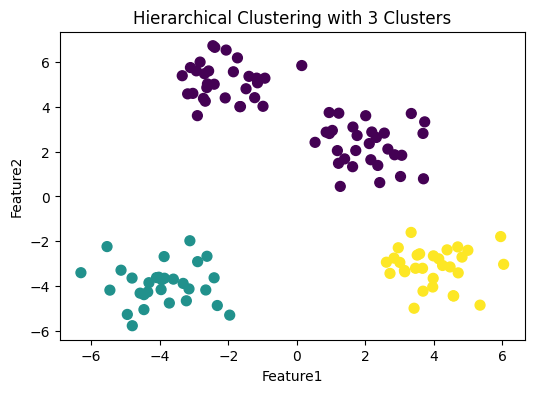

In [5]:
# 執行階層式聚類，分成 3 群
labels_3 = run_hierarchical_clustering(X, n_clusters=3, title='Hierarchical Clustering with 3 Clusters')